<a href="https://colab.research.google.com/github/Aleena-Memon/Machine-Learning-Projects/blob/main/cat_vs_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from  keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generator (divide large data into patches so keras provides generator)
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels ='inferred',
    label_mode ='int',
    batch_size = 32,
    image_size =(256, 256)


)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels ='inferred',
    label_mode ='int',
    batch_size = 32,
    image_size =(256, 256)


)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize (for pixel 0-1 between       not 0-256)

def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding ='valid', activation='relu',input_shape=(256,256,3)))
# BatchNormalization and Dropout use for overlifting
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding ='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding ='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten()) # Faltten convert multimDim into single dim because dense deals with single dimeal

model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation= 'sigmoid'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
205/625 [========>.....................] - ETA: 39s - loss: 2.7291 - accuracy: 0.5561

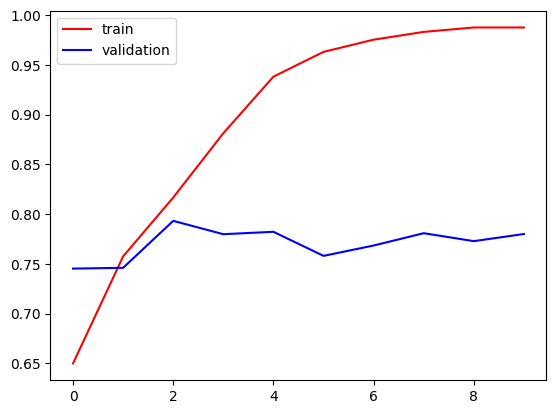

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color="red", label="train")
plt.plot(history.history['val_accuracy'], color="blue", label="validation")
plt.legend()
plt.show()




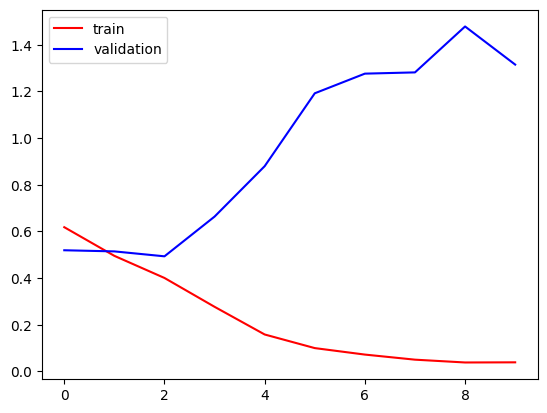

In [ ]:
plt.plot(history.history['loss'], color="red", label="train")
plt.plot(history.history['val_loss'], color="blue", label="validation")
plt.legend()
plt.show()
